# imports

In [ ]:
# essential imports

In [2]:
import pandas as pd 
import numpy as np

In [ ]:
# visual imports

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
# sns.set_palette('Paired')

# import data

In [53]:
# import individual stats data
stats = pd.read_csv('all-table1.csv', index_col= 0)

In [13]:
# import individual match data
match = pd.read_csv('match.csv', index_col= 0)

In [14]:
# import merge stats and match, merged stats
merged = pd.read_csv('merged.csv', index_col= 0)

# Stats Explore

In [54]:
# put columns names in a list
cols = stats.columns.to_list()

In [55]:
# take the name, lower, replace the spaces with underscore and save them to cols*
cols = [i.lower().replace(' ', '_') for i in cols]

In [56]:
# the df columns now = the list cols
stats.columns = cols

In [52]:
# define a lambda function to extract the last string after the last hyphen
# extract_last_string = lambda x: x.split('-')[-1]
# apply the lambda function to the 'robot' and create a new column 'last_string'
# stats['last_string'] = stats['robot'].apply(extract_last_string)

In [57]:
# looking at
stats.sort_values(by = 'total_matches',ascending= False)

,total_matches,win_percentage,total_wins,losses,knockouts,ko_percentage,average_knockout_time,knockouts_against,ko_against_percentage,judges_decision_wins,robot
180,39.0,69%,27.0,12.0,19.0,49%,87 s,10,26%,8.0,witch-doctor-2020
56,39.0,69%,27.0,12.0,19.0,49%,87 s,10,26%,8.0,witch-doctor-wcvii
247,39.0,69%,27.0,12.0,19.0,49%,87 s,10,26%,8.0,25345
117,39.0,69%,27.0,12.0,19.0,49%,87 s,10,26%,8.0,witch-doctor-2021
301,39.0,69%,27.0,12.0,19.0,49%,87 s,10,26%,8.0,witch-doctor-2018
...,...,...,...,...,...,...,...,...,...,...,...
326,0.0,0%,0.0,0.0,0.0,0,0,0,0%,0.0,hellachopper
343,0.0,0%,0.0,0.0,0.0,0,0,0,0%,0.0,preying-mantis
14,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,dragon-king-wcvii
11,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,doom-wcvii


# Who has played the most matches

<AxesSubplot:xlabel='total_matches', ylabel='robot'>

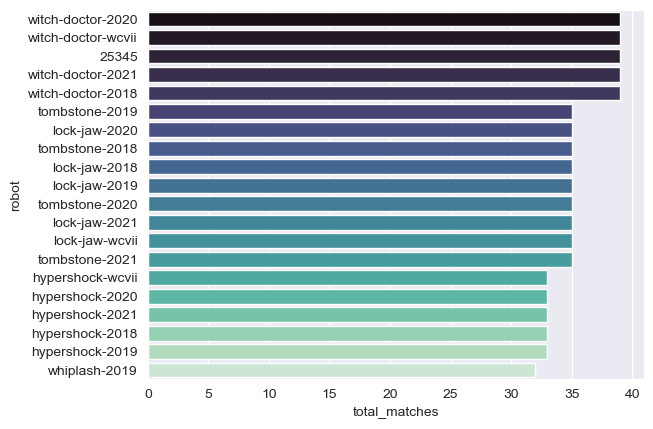

In [132]:
sns.barplot(palette= 'mako',x = 'total_matches', y = 'robot', data = stats.sort_values(by = 'total_matches',ascending= False).head(20))


# What robots are playing the least amount of matches

<AxesSubplot:xlabel='total_matches', ylabel='robot'>

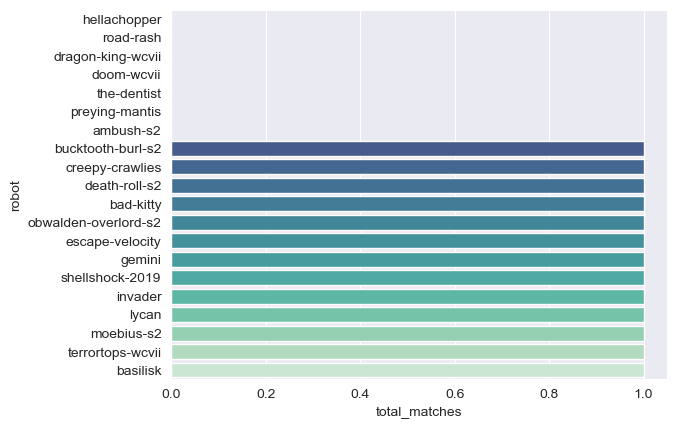

In [88]:
sns.barplot(palette= 'mako',x = 'total_matches', y = 'robot', data = stats.sort_values(by = 'total_matches',ascending= True).head(20))



# what robots are winning 50 % of their matches

In [99]:
test = '33%'

In [102]:
test.split('%')[0]

'33'

In [108]:
num_strip = lambda x: str(x).split('%')[0] if isinstance(x, str) else x
stats['win_percentage'] = stats['win_percentage'].apply(num_strip)
stats['win_percentage'] = stats.win_percentage.astype('float')

In [173]:
win_fifty_or_more = stats[stats.win_percentage >= 50]

In [174]:
win_fifty_or_more = win_fifty_or_more.sort_values(by = ['total_matches', 'win_percentage', 'ko_percentage'],ascending= False)

<AxesSubplot:xlabel='total_matches', ylabel='robot'>

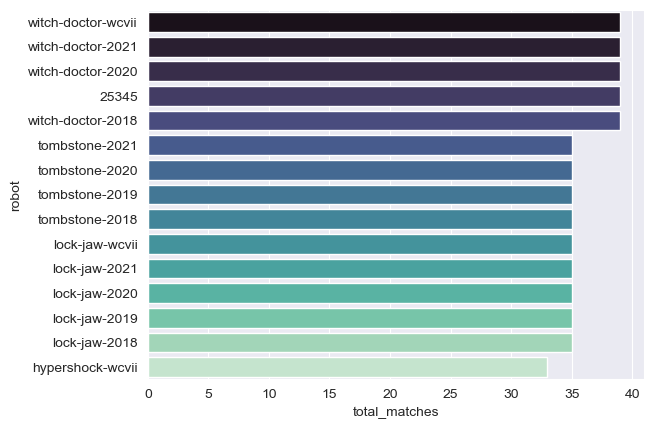

In [175]:
sns.barplot(palette= 'mako',x = 'total_matches', y = 'robot', data = win_fifty_or_more.head(15))

In [145]:
# this cleans the ko_percentage
num_strip = lambda x: str(x).split('%')[0] if isinstance(x, str) else x
stats['ko_percentage'] = stats['ko_percentage'].apply(num_strip)
stats['ko_percentage'] = stats.ko_percentage.astype('float') 

In [169]:
# this cleans the average_knockout_time
num_strip = lambda x: str(x).split(' ')[0] if isinstance(x, str) else x
stats['average_knockout_time'] = stats['average_knockout_time'].apply(num_strip)
stats['average_knockout_time'] = stats.ko_percentage.astype('float') 

In [171]:
test = '87 s'

In [172]:
str(test).split(' ')[0]

'87'

In [176]:
win_fifty_or_more

,total_matches,win_percentage,total_wins,losses,knockouts,ko_percentage,average_knockout_time,knockouts_against,ko_against_percentage,judges_decision_wins,robot
56,39.0,69.0,27.0,12.0,19.0,49.0,49.0,10,26%,8.0,witch-doctor-wcvii
117,39.0,69.0,27.0,12.0,19.0,49.0,49.0,10,26%,8.0,witch-doctor-2021
180,39.0,69.0,27.0,12.0,19.0,49.0,49.0,10,26%,8.0,witch-doctor-2020
247,39.0,69.0,27.0,12.0,19.0,49.0,49.0,10,26%,8.0,25345
301,39.0,69.0,27.0,12.0,19.0,49.0,49.0,10,26%,8.0,witch-doctor-2018
...,...,...,...,...,...,...,...,...,...,...,...
378,2.0,50.0,1.0,1.0,0.0,0.0,0.0,1,50%,1.0,plan-x
379,2.0,50.0,1.0,1.0,0.0,0.0,0.0,1,50%,1.0,radioactive
13,1.0,100.0,1.0,0.0,1.0,100.0,100.0,0,0%,0.0,double-tap-wcvii
52,1.0,100.0,1.0,0.0,1.0,100.0,100.0,0,0%,0.0,terrortops-wcvii


In [205]:
heavy_hitters = win_fifty_or_more[(win_fifty_or_more.ko_percentage >= 50) & (win_fifty_or_more.average_knockout_time <= 50)]

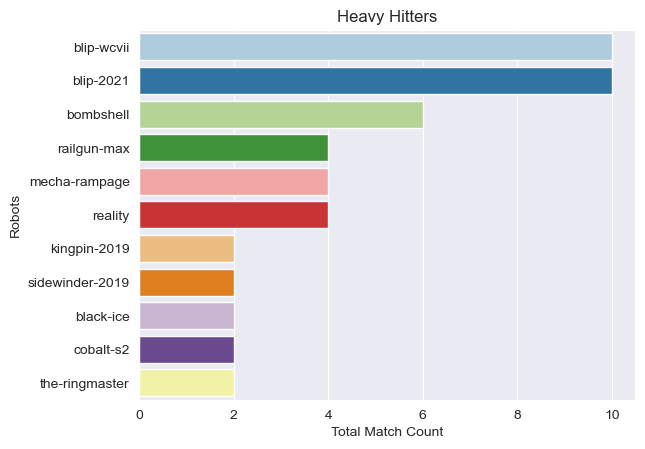

In [229]:
sns.barplot(y = 'robot', x = 'total_matches', data = heavy_hitters)
plt.title('Heavy Hitters')
plt.xlabel('Total Match Count')
plt.ylabel('Robots')

None

<div class="alert alert-block alert-success">
<b>Heavy Hitters:</b> 
This is comprised of robots that meet this criteria
    
* win_percentage > 50%
    
* average_knockout_time > 50 seconds or less
</div>

# Let's look at losers

In [292]:
losers = stats[stats.win_percentage <= 49]

In [293]:
losers = losers.sort_values(by=['total_matches', 'win_percentage'], ascending=[False, False])


In [290]:
names = [s.split('-')[0] for s in stats['robot']]

# replace the name_suffix column with the new names column
stats['robots'] = names

# add the season column to the DataFrame
stats['season'] = [s.split('-')[-1] for s in stats['robot']]


In [291]:
stats

,total_matches,win_percentage,total_wins,losses,knockouts,ko_percentage,average_knockout_time,knockouts_against,ko_against_percentage,judges_decision_wins,robot,season,robots
0,3.0,33.0,1.0,2.0,0.0,0.0,0.0,1,33%,1.0,banshee-wcvii,wcvii,banshee
1,12.0,67.0,8.0,4.0,3.0,25.0,25.0,3,25%,5.0,beta-wcvii,wcvii,beta
2,11.0,18.0,2.0,9.0,1.0,9.0,9.0,6,55%,1.0,big-dill-wcvii,wcvii,big
3,24.0,67.0,16.0,8.0,10.0,42.0,42.0,0,0%,8.0,black-dragon-wcvii,wcvii,black
4,10.0,70.0,7.0,3.0,5.0,50.0,50.0,1,10%,2.0,blip-wcvii,wcvii,blip
...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,11.0,91.0,10.0,1.0,8.0,73.0,73.0,0,0%,2.0,tombstone,tombstone,tombstone
385,5.0,40.0,2.0,3.0,2.0,40.0,40.0,1,20%,0.0,warhead,warhead,warhead
386,4.0,50.0,2.0,2.0,1.0,25.0,25.0,2,50%,0.0,warrior-clan,clan,warrior
387,5.0,40.0,2.0,3.0,2.0,40.0,40.0,3,60%,0.0,witch-doctor,doctor,witch


In [295]:
losers

,total_matches,win_percentage,total_wins,losses,knockouts,ko_percentage,average_knockout_time,knockouts_against,ko_against_percentage,judges_decision_wins,robot,season,robots
6,26.0,27.0,7.0,19.0,7.0,27.0,27.0,15,58%,0.0,captain-shredderator-wcvii,wcvii,captain
63,26.0,27.0,7.0,19.0,7.0,27.0,27.0,15,58%,0.0,captain-shrederator-2021,2021,captain
130,26.0,27.0,7.0,19.0,7.0,27.0,27.0,15,58%,0.0,captain-shrederator-2020,2020,captain
190,26.0,27.0,7.0,19.0,7.0,27.0,27.0,15,58%,0.0,captain-shrederator-2019,2019,captain
258,26.0,27.0,7.0,19.0,7.0,27.0,27.0,15,58%,0.0,captain-shrederator-3,3,captain
...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0%,0.0,ambush-s2,s2,ambush
321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0%,0.0,the-dentist,dentist,the
326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0%,0.0,hellachopper,hellachopper,hellachopper
343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0%,0.0,preying-mantis,mantis,preying


<AxesSubplot:xlabel='total_matches', ylabel='robot'>

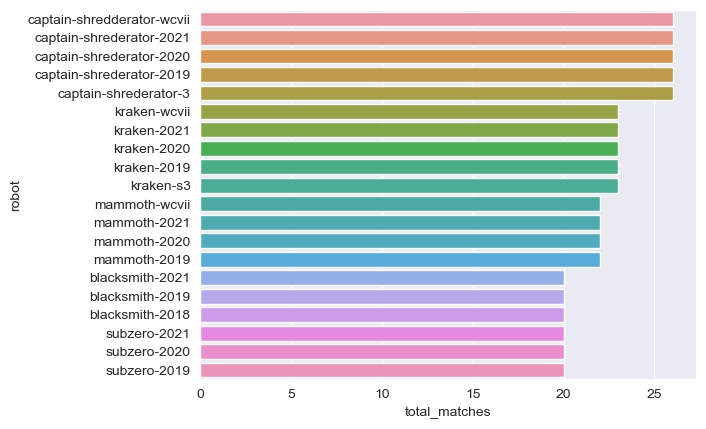

In [294]:
sns.barplot(y = 'robot', x = 'total_matches', data = losers.head(20))